https://colab.research.google.com/drive/1uJWIEkSzBOcKqeR5cKV7hQZT8Ft9hzJO?usp=sharing

Actividad 6: Redes neuronales
Nombre: Diego de la Rosa Ornelas

Matricula:1999357

Hora:N4

¿Cuántas épocas usaste para mejorar el rendimiento del modelo en comparación con la red neuronal prealimentada de la actividad 5?

Usé la misma cantidad


¿Obtuviste un mejor rendimiento con este modelo o con el de la actividad 5? ¿Por qué?

No, lo note al mismo nivel que la actividad 5, supongo que es porque use la misma cantidad de epocas y el codigo fue similar y con el mismo conjunto de datos



In [22]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [23]:
mnist_data = tf.keras.datasets.mnist.load_data(path="mnist.npz")

(train_images, train_labels), (test_images, test_labels) = mnist_data

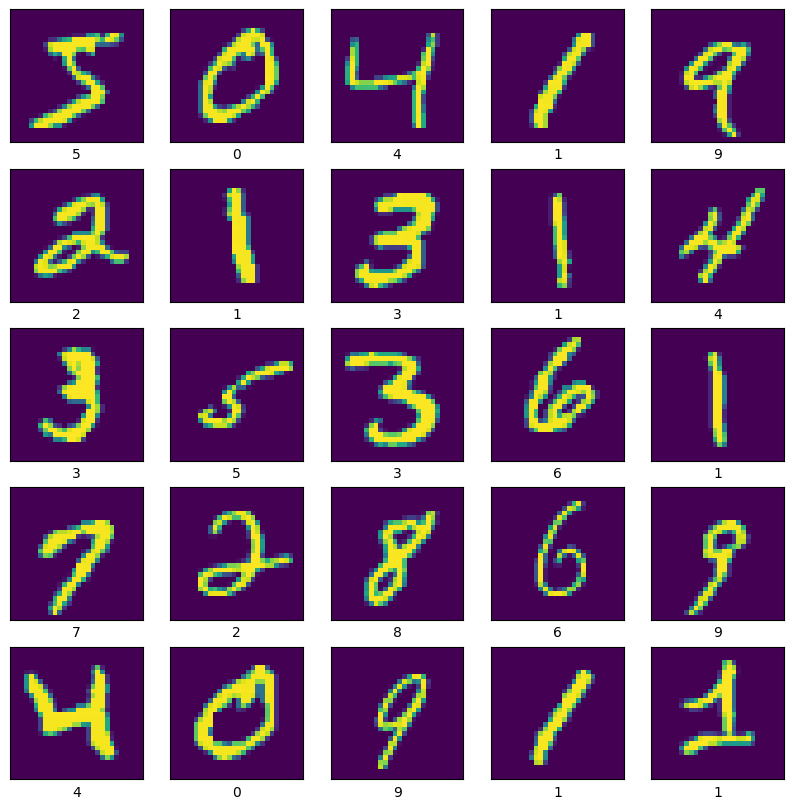

In [24]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 5574

In [27]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 576)              

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 56s 29ms/step - loss: 0.1716 - accuracy: 0.9540 - val_loss: 0.0685 - val_accuracy: 0.9786
Epoch 2/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0577 - accuracy: 0.9820 - val_loss: 0.0442 - val_accuracy: 0.9861
Epoch 3/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0462 - accuracy: 0.9859 - val_loss: 0.0398 - val_accuracy: 0.9878
Epoch 4/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0374 - accuracy: 0.9883 - val_loss: 0.0455 - val_accuracy: 0.9871
Epoch 5/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0329 - accuracy: 0.9898 - val_loss: 0.0551 - val_accuracy: 0.9843
Epoch 6/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0311 - accuracy: 0.9911 - val_loss: 0.0440 - val_accuracy: 0.9881
Epoch 7/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0266 - accuracy: 0.9919 - val_loss: 0.0505 -

313/313 - 2s - loss: 0.0673 - accuracy: 0.9842 - 2s/epoch - 8ms/step


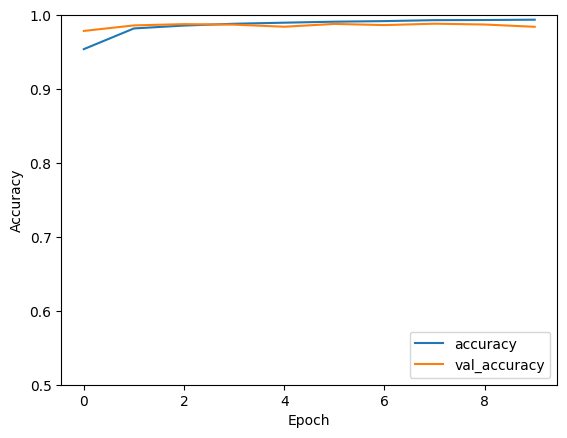

In [30]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [31]:
print(test_acc)

0.9842000007629395


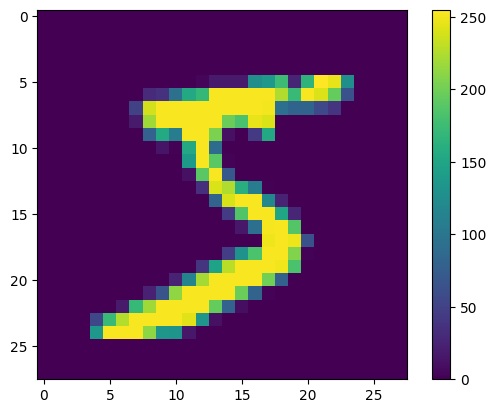

In [38]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [39]:
train_images = train_images / 255.0

test_images = test_images / 255.0

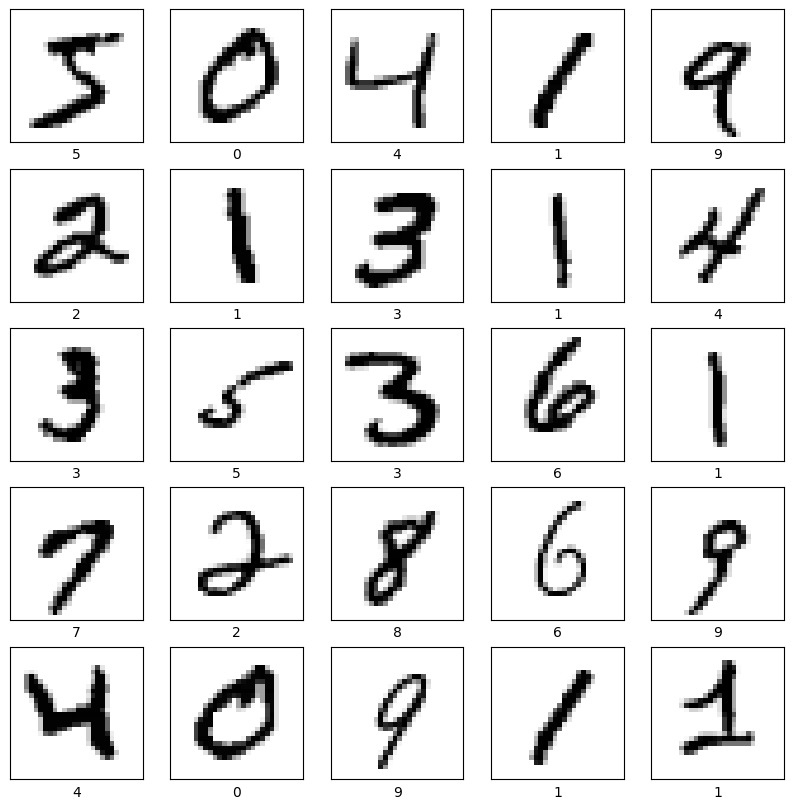

In [40]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [41]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [42]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [43]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2590 - accuracy: 0.9266
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1140 - accuracy: 0.9666
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0793 - accuracy: 0.9761
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0585 - accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0452 - accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0361 - accuracy: 0.9887
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0293 - accuracy: 0.9905
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0222 - accuracy: 0.9929
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0186 - accuracy: 0.9947
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.015

In [44]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0768 - accuracy: 0.9794 - 879ms/epoch - 3ms/step

Test accuracy: 0.9793999791145325


In [45]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [46]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [47]:
predictions[0]

array([1.2865394e-07, 1.7461168e-12, 2.3086682e-07, 9.7636483e-04,
       2.1761984e-14, 1.8518305e-09, 3.3569091e-14, 9.9902266e-01,
       1.0941414e-08, 5.6423403e-07], dtype=float32)

In [48]:
np.argmax(predictions[0])

7

In [49]:
test_labels[0]

7

In [50]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

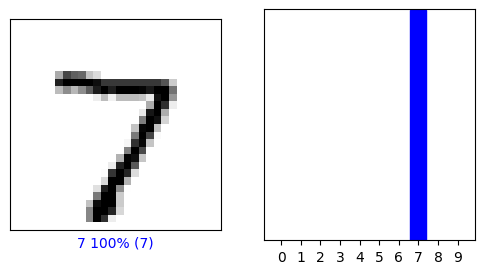

In [51]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

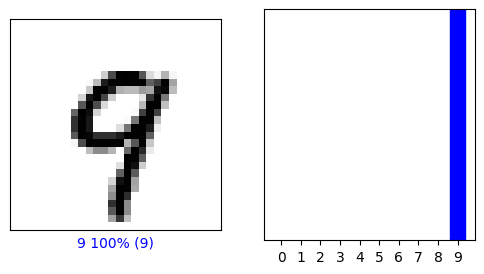

In [52]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

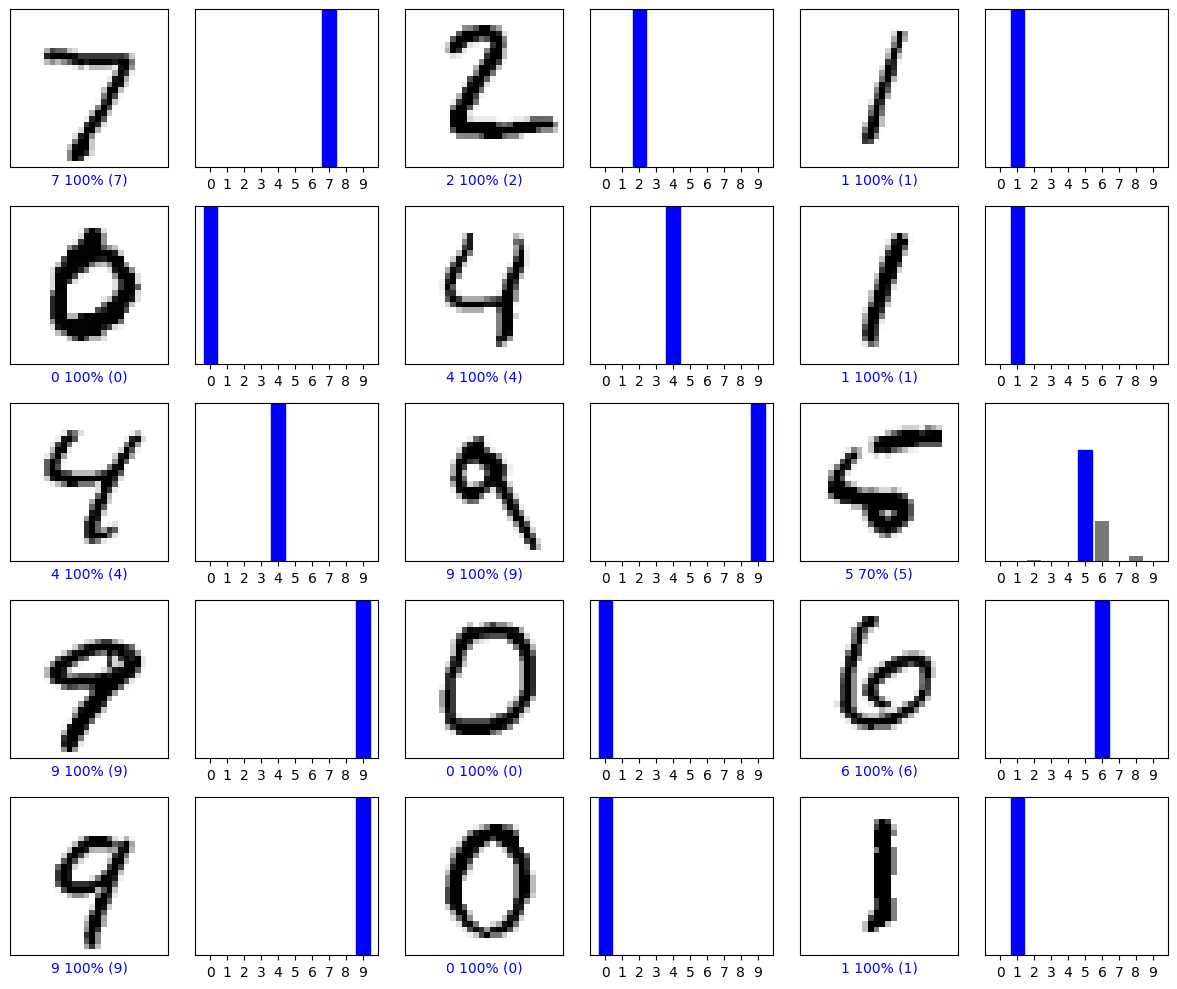

In [53]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()